In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sb

In [ ]:
PROJPATH = Path().resolve().parent
breakupdata = PROJPATH / "data/breakupdata/derived"
stationdata = PROJPATH / "data/weatherstations/ACIS/TDD/tdd_climatologies"

In [ ]:
stations_tddclim = stationdata.glob("*.csv")
stations_tddclim_list = list(stations_tddclim)

## Prototyping

In [ ]:
testdata = pd.read_csv(stations_tddclim_list[3], skiprows=4, index_col=0)
testdata

,Tavg_F,tdd
d_since_march1,,
0,7.33,0.00
1,4.54,0.00
2,5.13,0.00
3,6.68,0.00
4,8.46,0.00
...,...,...
117,61.28,29.28
118,60.83,28.83
119,60.87,28.87


In [ ]:
stationname = stations_tddclim_list[3].stem[:-14]
testdf = pd.DataFrame(testdata.cumsum()['tdd'])
testdf.columns = [stationname]
testdf

,COLLEGE_OBSERVATORY
d_since_march1,
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
117,1312.75
118,1341.58
119,1370.45


<AxesSubplot: xlabel='d_since_march1', ylabel='tdd'>

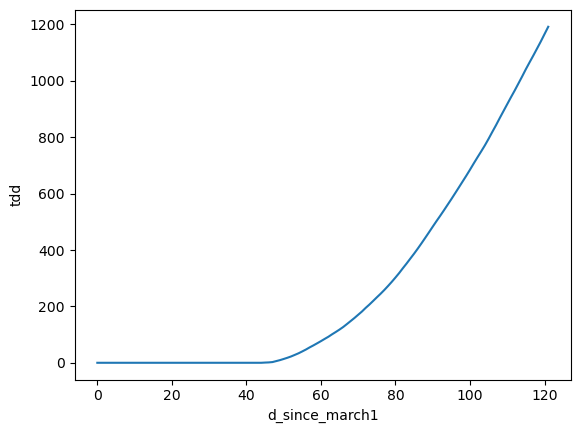

In [ ]:
sb.lineplot(data=testdata.cumsum()['tdd'])

### Loop

In [ ]:
alltdd = []
for fpth in stations_tddclim_list:
    stationname = fpth.stem[:-14]
    testdata = pd.read_csv(fpth, skiprows=4, index_col=0)
    testdf = pd.DataFrame(testdata['tdd'].cumsum())
    testdf.columns = [stationname]
    alltdd.append(testdf)

In [ ]:
pd.concat(alltdd)

,GULKANA_AIRPORT,TANANA_AIRPORT,KETCHIKAN_AIRPORT,COLLEGE_OBSERVATORY,AUKE_BAY,BETHEL_AIRPORT,ANCHORAGE_MERRILL_FIELD,SKAGWAY_AIRPORT,EAGLE,BIG_DELTA_AIRPORT,...,ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT,YAKUTAT_AIRPORT,ALYESKA,NENANA_MUN_AP,HOMER_AIRPORT,NORTHWAY_AIRPORT,CHICKEN,FAIRBANKS_INTL_AP,DUTCH_HARBOR,MCKINLEY_PARK
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,925.74
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.08
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,971.67
